In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import boston_housing

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = boston_housing.load_data()

In [ ]:
training_dataset_x.shape

(404, 13)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(training_dataset_x)
training_dataset_x = mms.transform(training_dataset_x)
test_dataset_x = mms.transform(test_dataset_x)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# create keras model and add the layers
model = Sequential(name='BostonHousingPrices')
model.add(Dense(100, input_dim = training_dataset_x.shape[1], activation='relu', name='Hidden-1'))
model.add(Dense(100, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='linear', name='Output'))


In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

Epoch 1/100
11/11 [==============================] - 1s 17ms/step - loss: 530.6725 - mae: 21.0468 - val_loss: 543.8356 - val_mae: 21.3414
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 437.5648 - mae: 18.6048 - val_loss: 435.0057 - val_mae: 18.4787
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 331.1402 - mae: 15.3279 - val_loss: 306.9809 - val_mae: 14.5103
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 224.6591 - mae: 11.7765 - val_loss: 198.0403 - val_mae: 11.1212
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 155.1597 - mae: 9.5350 - val_loss: 155.0833 - val_mae: 9.6763
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 129.3235 - mae: 8.6436 - val_loss: 126.6253 - val_mae: 8.6710
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 111.7137 - mae: 7.9355 - val_loss: 112.9736 - val_mae: 7.9892
Epoch 8/100
11/11 [===========================

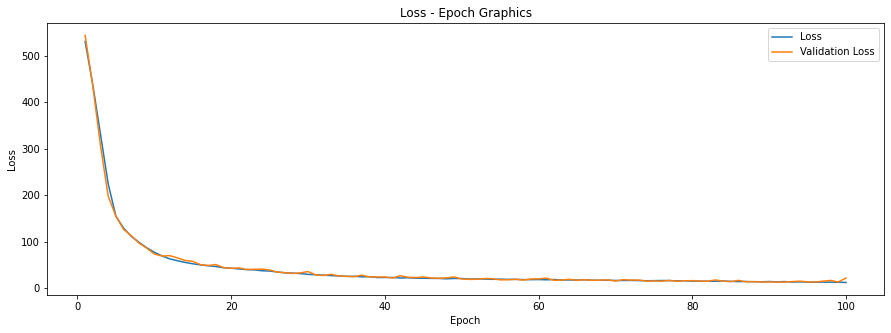

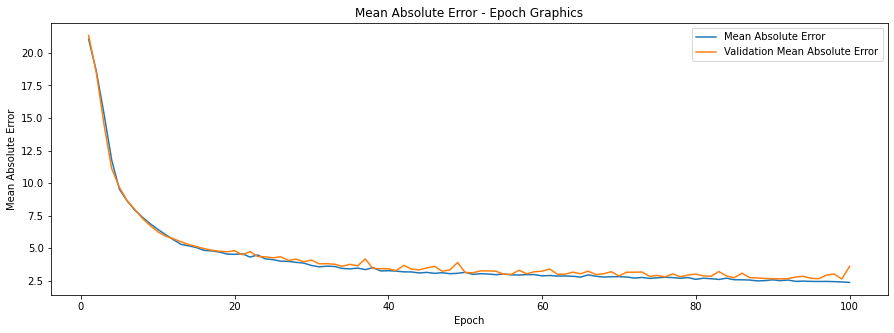

In [ ]:
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=100, validation_split=0.2)

# this part is for drawing the graphs
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Mean Absolute Error - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.plot(range(1, len(hist.history['val_mae']) + 1), hist.history['val_mae'])
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

In [ ]:
test_result = model.evaluate(test_dataset_x, test_dataset_y)
for i in range(len(test_result)):
    print(f'{model.metrics_names[i]} ---> {test_result[i]}')

4/4 [==============================] - 0s 3ms/step - loss: 41.0280 - mae: 4.3859
loss ---> 41.02798080444336
mae ---> 4.38585901260376


In [ ]:
print(test_dataset_x, test_dataset_y, test_result)

[[2.03195508e-01 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  6.79055928e-02 7.53863135e-01]
 [1.31471460e-03 0.00000000e+00 3.50073314e-01 ... 5.53191489e-01
  9.95082959e-01 3.99558499e-01]
 [5.46814270e-04 0.00000000e+00 1.73387097e-01 ... 8.08510638e-01
  1.00000000e+00 2.21026490e-01]
 ...
 [2.05400974e-02 0.00000000e+00 7.00879765e-01 ... 2.23404255e-01
  9.81617832e-01 5.24282561e-03]
 [3.95380999e-03 0.00000000e+00 2.10410557e-01 ... 5.10638298e-01
  9.86887891e-01 2.20198675e-01]
 [3.27940197e-02 0.00000000e+00 7.00879765e-01 ... 2.23404255e-01
  6.04770790e-01 2.22958057e-01]] [ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 

In [ ]:
print(test_dataset_x)

[[2.03195508e-01 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  6.79055928e-02 7.53863135e-01]
 [1.31471460e-03 0.00000000e+00 3.50073314e-01 ... 5.53191489e-01
  9.95082959e-01 3.99558499e-01]
 [5.46814270e-04 0.00000000e+00 1.73387097e-01 ... 8.08510638e-01
  1.00000000e+00 2.21026490e-01]
 ...
 [2.05400974e-02 0.00000000e+00 7.00879765e-01 ... 2.23404255e-01
  9.81617832e-01 5.24282561e-03]
 [3.95380999e-03 0.00000000e+00 2.10410557e-01 ... 5.10638298e-01
  9.86887891e-01 2.20198675e-01]
 [3.27940197e-02 0.00000000e+00 7.00879765e-01 ... 2.23404255e-01
  6.04770790e-01 2.22958057e-01]]


In [ ]:
predict_result = model.predict(test_dataset_x)

In [ ]:
for i in range(len(predict_result)):
  print(predict_result[i], test_dataset_y[i])


[11.38303] 7.2
[20.699167] 18.8
[23.144863] 19.0
[38.224743] 27.0
[26.09264] 22.2
[21.333887] 24.5
[31.4955] 31.2
[25.3823] 22.9
[21.310884] 20.5
[26.0901] 23.2
[16.726679] 18.6
[20.849983] 14.5
[19.96752] 17.8
[42.300976] 50.0
[20.621529] 20.8
[22.086174] 24.3
[26.9886] 24.2
[22.789635] 19.8
[22.631739] 19.1
[37.475037] 22.7
[14.238835] 12.0
[16.95354] 10.2
[21.902485] 20.0
[16.365997] 18.5
[22.327724] 20.9
[28.526537] 23.0
[37.327904] 27.5
[28.749516] 30.1
[14.078028] 9.5
[22.637285] 22.0
[23.001225] 21.2
[18.955969] 14.1
[40.11583] 33.1
[25.24882] 23.4
[20.317766] 20.1
[11.862656] 7.4
[17.699673] 15.4
[18.958132] 23.8
[22.263021] 20.1
[29.07352] 24.5
[27.861301] 33.0
[29.561491] 28.4
[19.877037] 14.1
[42.067993] 46.7
[33.47006] 32.5
[24.754242] 29.6
[31.638323] 28.4
[19.90218] 19.8
[29.13318] 20.2
[24.634613] 25.0
[34.691376] 35.4
[20.209301] 20.3
[14.430031] 9.7
[18.030413] 14.5
[38.43305] 34.9
[29.650024] 26.6
[18.571463] 7.2
[47.712368] 50.0
[41.69155] 32.4
[26.292873] 21.6
[31.1